# **Importing the libraries**


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

# **Importing the dataset**

In [ ]:
house_price_dataset = sklearn.datasets.fetch_california_housing()

In [ ]:
print(house_price_dataset)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [ ]:
# Loading the dataset to a pandas dataframe
house_price_dataframe = pd.DataFrame(house_price_dataset.data, columns = house_price_dataset.feature_names)

In [ ]:
# print first 5 rows of dataframe
house_price_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
# checking the number od rows and columns in the dataframe
house_price_dataframe.shape

(20640, 9)

In [ ]:
# checking for missing values
house_price_dataframe.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
price         0
dtype: int64

In [ ]:
# statistical measures of the dataset
house_price_dataframe.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


# **Understanding the correlation between various features of the dataset**

1.   **Positive Correlation -->** one variable increases then the other variable also increases
2.   **Negative Correlation -->** one variable decreases then the other variable also decreases



In [ ]:
correlation = house_price_dataframe.corr()

<Axes: >

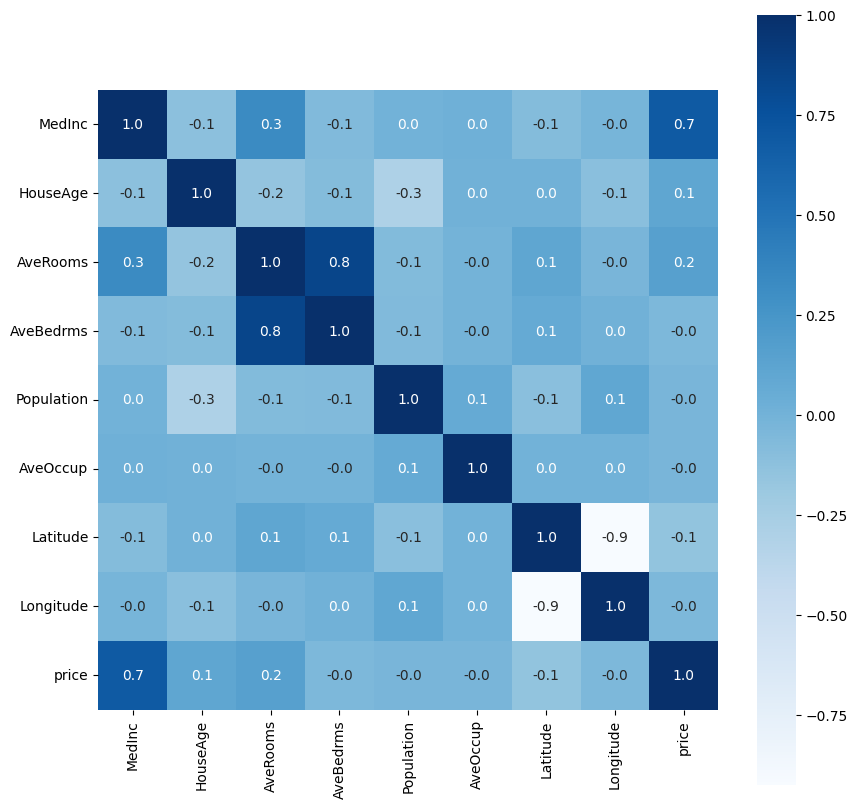

In [ ]:
# constructing a heatmap to understand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt=".1f", annot=True, annot_kws={'size':10}, cmap="Blues")

***Spliting the data and target***

In [ ]:
X = house_price_dataframe.drop(['price'], axis=1)
Y = house_price_dataframe['price']

In [ ]:
print(X)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

In [ ]:
print(Y)

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: price, Length: 20640, dtype: float64


# **Spliting the data into training and test data**

In [ ]:
X_train , X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(20640, 8) (16512, 8) (4128, 8)


# **Model training**

# **XGBoost Regressor**

In [ ]:
# load the model
model = XGBRegressor()

In [ ]:
# training the model with X_train
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

# **Evaluation**

# **Prediction on training data**

In [ ]:
# accuracy for prediciton on training data
training_data_prediciton = model.predict(X_train)

In [ ]:
print(X_train)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
2072   1.4817       6.0  4.443645   1.134293      1397.0  3.350120     36.77   
10600  6.9133       8.0  5.976471   1.026471       862.0  2.535294     33.68   
2494   1.5536      25.0  4.088785   1.000000       931.0  4.350467     36.60   
4284   1.5284      31.0  2.740088   1.008811       597.0  2.629956     34.10   
16541  4.0815      21.0  5.166667   1.002688      1130.0  3.037634     37.79   
...       ...       ...       ...        ...         ...       ...       ...   
1099   3.0625      20.0  5.860000   1.112000       745.0  2.980000     39.59   
18898  2.6133      49.0  5.163755   1.100437      1131.0  2.469432     38.11   
11798  4.4958      19.0  5.899767   1.074592      1206.0  2.811189     38.92   
6637   2.5750      39.0  3.591203   1.086675      2546.0  3.293661     34.16   
2575   2.2478      31.0  5.123810   1.100000      1259.0  2.997619     40.80   

       Longitude  
2072     -119.84  
1

In [ ]:
# R squared error
score_1 = metrics.r2_score(Y_train, training_data_prediciton)

# Mean Absolute error
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediciton)
print("R sqaured error: ", score_1)
print("Mean Absolute error: ", score_2)
# lower the mae, better is the model

R sqaured error:  0.943650140819218
Mean Absolute error:  0.1933648700612105


# **Visualzing the actual Prices and predicted prices**

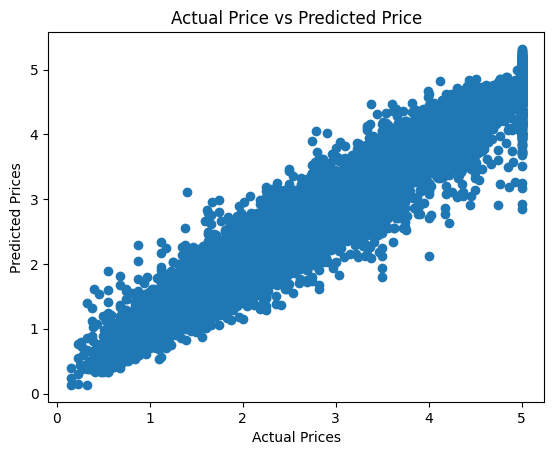

In [ ]:
plt.scatter(Y_train, training_data_prediciton)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()

# **Prediction on Test Data**

In [ ]:
# accuracy for prediciton on test data
test_data_prediciton = model.predict(X_test)

In [ ]:
print(X_test)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
10385  6.4114      15.0  7.527559   1.049869      2529.0  3.318898     33.60   
1943   4.1843      12.0  6.330084   1.041783      2033.0  2.831476     38.62   
7490   1.7411      35.0  5.369159   1.294393       909.0  4.247664     33.93   
16889  3.4412      39.0  4.173405   1.074573      2156.0  1.937107     37.59   
11416  7.8195      16.0  8.602349   1.058725      2142.0  3.593960     33.70   
...       ...       ...       ...        ...         ...       ...       ...   
13767  4.8173      25.0  6.160494   1.081481      1071.0  2.644444     34.04   
20606  2.0800      30.0  5.140316   1.055336      1702.0  3.363636     39.12   
7340   2.1743      30.0  3.364395   0.994437      3208.0  4.461752     33.97   
14312  1.6023      32.0  3.878788   1.069697      1335.0  4.045455     32.70   
20262  4.2227      28.0  4.899533   0.947430      2556.0  2.985981     34.21   

       Longitude  
10385    -117.65  
1

In [ ]:
# R squared error
score_1 = metrics.r2_score(Y_test, test_data_prediciton)
# Mean Absolute error
score_2 = metrics.mean_absolute_error(Y_test, test_data_prediciton)
print("R sqaured error: ", score_1)
print("Mean Absolute error: ", score_2)
# lower the mae, better is the model

R sqaured error:  0.8338000331788725
Mean Absolute error:  0.3108631800268186
